# SongNets
## Moses Boudourides

In [1]:
import thecypher as cy
import pandas as pd
import resource
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
import warnings
warnings.filterwarnings('ignore')
print resource.getrlimit(resource.RLIMIT_STACK)
print sys.getrecursionlimit()
max_rec = 0x100000
# resource.setrlimit(resource.RLIMIT_STACK, [0x100 * max_rec, resource.RLIM_INFINITY])
sys.setrecursionlimit(max_rec)

(8388608, 67104768)
1000


In [2]:
band='Led Zeppelin'
songs = cy.get_lyrics('Led Zeppelin')
print len(songs)
songs[0]

2019-02-08 15:10:26,377 : INFO : GET Artist URL: http://lyrics.wikia.com/wiki/Led_Zeppelin
2019-02-08 15:10:26,878 : INFO : GET Artist Album: Houses of the Holy (1973)
2019-02-08 15:10:30,746 : INFO : GET Artist Album Successful: Houses of the Holy (1973)
2019-02-08 15:10:30,769 : INFO : GET Artist Album: BBC Sessions (1997)
2019-02-08 15:10:37,390 : INFO : GET Artist Album Successful: BBC Sessions (1997)
2019-02-08 15:10:37,392 : INFO : GET Artist Album: Led Zeppelin (1969)
2019-02-08 15:10:38,760 : INFO : GET Artist Album Successful: Led Zeppelin (1969)
2019-02-08 15:10:38,763 : INFO : GET Artist Album: Physical Graffiti (1975)
2019-02-08 15:10:42,409 : INFO : GET Artist Album Successful: Physical Graffiti (1975)
2019-02-08 15:10:42,411 : INFO : GET Artist Album: Coda (1982)
2019-02-08 15:10:45,827 : INFO : GET Artist Album Successful: Coda (1982)
2019-02-08 15:10:45,828 : INFO : GET Artist Album: Misc (0000)
2019-02-08 15:10:45,831 : INFO : GET Artist Album Successful: Misc (0000)
2

4577


{'album': u'Houses of the Holy (1973)',
 'album_genre': '',
 'artist': 'Led Zeppelin',
 'genre': '',
 'id': 0L,
 'lyric': u'It is the springtime of my loving',
 'song': u'The Rain Song',
 'year': u'1973'}

In [3]:
sdf = pd.DataFrame(songs)
group = ['song', 'year', 'album', 'genre', 'artist']
ldf = sdf.sort_values(group)\
       .groupby(group).lyric\
       .apply(' '.join)\
       .reset_index(name='lyric')
print len(ldf) 
ldf.rename(columns={'album': 'albumy'}, inplace=True)
ldf.columns
alb=[]
for i in range(len(ldf)):
    alb.append(ldf.iloc[i]['albumy'][:-7])
ldf['album']=alb
# ldf=ldf.drop('albumy', axis=1)
ldf=ldf.drop('genre', axis=1)
ldf=ldf.drop('artist', axis=1)
ldf=ldf[["song","album","year","albumy","lyric"]]
ldf

123


,song,album,year,albumy,lyric
0,Achilles Last Stand,Presence,1976,Presence (1976),It was an April morning When they told us we s...
1,All My Love,In Through the Out Door,1979,In Through the Out Door (1979),"Should I fall out of love, my fire in the ligh..."
2,Babe I'm Gonna Leave You,Led Zeppelin,1969,Led Zeppelin (1969),"Babe, baby, baby, I'm gonna leave you I said, ..."
3,Baby Come On Home,Coda,1982,Coda (1982),"There was a time, I used to call you on my ver..."
4,Black Country Woman,Physical Graffiti,1975,Physical Graffiti (1975),"Hey, hey, mama, what's the matter here? Hey, h..."
5,Black Dog,Led Zeppelin IV,1971,Led Zeppelin IV (1971),"Hey, hey, Mama, said, the way you move Gonna m..."
6,Black Dog,BBC Sessions,1997,BBC Sessions (1997),"Hey, hey, mama, said the way you move Gonna ma..."
7,Black Dog,How The West Was Won,2003,How The West Was Won (2003),"Hey, hey, Mama, said, the way you move Gonna m..."
8,Boogie With Stu,Physical Graffiti,1975,Physical Graffiti (1975),"Playin' in town, my baby We just gotta rock on..."
9,Bring It On Home,Led Zeppelin II,1969,Led Zeppelin II (1969),"Baby, ooh, baby, mm-gon' bring it on home to y..."


In [4]:
lg=ldf["song"].groupby(ldf["albumy"]).count()
lg=lg.reset_index()
lg.rename(columns={'song': 'number of songs'}, inplace=True)
lg

,albumy,number of songs
0,BBC Sessions (1997),19
1,Coda (1982),10
2,Houses of the Holy (1973),8
3,How The West Was Won (2003),16
4,In Through the Out Door (1979),7
5,Led Zeppelin (1969),8
6,Led Zeppelin II (1969),8
7,Led Zeppelin III (1970),10
8,Led Zeppelin IV (1971),8
9,Physical Graffiti (1975),14


In [5]:
albums=list(set(ldf.album.values))
year=[]
no_songs=[]
for a in albums:
    no_songs.append(len(list(set(ldf.loc[ldf['album']==a]['song'].values))))
    year.append(list(set(ldf.loc[ldf['album']==a]['year'].values))[0])
    y=' '.join(list(set(ldf.loc[ldf['album']==a]['year'].values)))
    c=[]
album = albums
lgy = pd.DataFrame(
    {'album': album,
     'year': year,
     'number of songs': no_songs
    })
lgy=lgy[["album",'year','number of songs']]
lgy.sort_values('year')

,album,year,number of songs
0,Led Zeppelin II,1969,8
2,Led Zeppelin,1969,8
6,Led Zeppelin III,1970,10
10,Led Zeppelin IV,1971,8
11,Houses of the Holy,1973,8
5,Physical Graffiti,1975,14
3,Presence,1976,7
8,The Song Remains the Same,1976,8
7,In Through the Out Door,1979,7
1,Coda,1982,10


### 1. The bipartite graph of songs and albums

In [6]:
sae=[]
for i in range(len(ldf)):
    s=ldf.iloc[i]['song']
    a=ldf.iloc[i]['album']
    y=ldf.iloc[i]['year']
    ly=ldf.iloc[i]['lyric']
    sae.append((s,a,y,ly))
saed=[]
for t in sae:
    year_l={'year_l':(t[2],t[3])}
    if t[0] not in ldf.album.unique():
        saed.append((t[0],t[1],year_l)) #,lyric))
    else:
        saed.append((t[0]+"_song",t[1],year_l))
saed=sorted(saed)
albums=list(set(ldf.album.values))
# songs=set(ldf.song.values)
t1=[]
t11=[]
t2=[]
for a in albums:
    for s in ldf.song.unique():
        if s==a:
            t11.append(s)
            ss=s+"_song"
            if ss not in t1:
                t1.append(ss)
for s in ldf.song.unique():
     if s not in t11:
        t2.append(s)
songs=t1+t2
for i in songs:
    if i in albums:
        print i
H=nx.MultiGraph()
H.add_edges_from(saed)
print "The graph H connecting the %i songs to the %i albums has: \n %i nodes and %i edges" %(len(songs),len(albums),len(H.nodes()),len(H.edges()))
print "Is H multigraph?", H.is_multigraph()
print "Is H bipartite?", nx.is_bipartite(H)

The graph H connecting the 89 songs to the 12 albums has: 
 101 nodes and 123 edges
Is H multigraph? True
Is H bipartite? True


In [7]:
# H.edges(data=True)

In [8]:
pos = nx.spring_layout(H, k=15.,iterations=1000)
r=0.3 #26
Ga=nx.Graph()
Ga.add_nodes_from(albums)
posalb=nx.circular_layout(Ga)
for a in albums:
    pos[a]=(r*posalb[a][0],r*posalb[a][1])

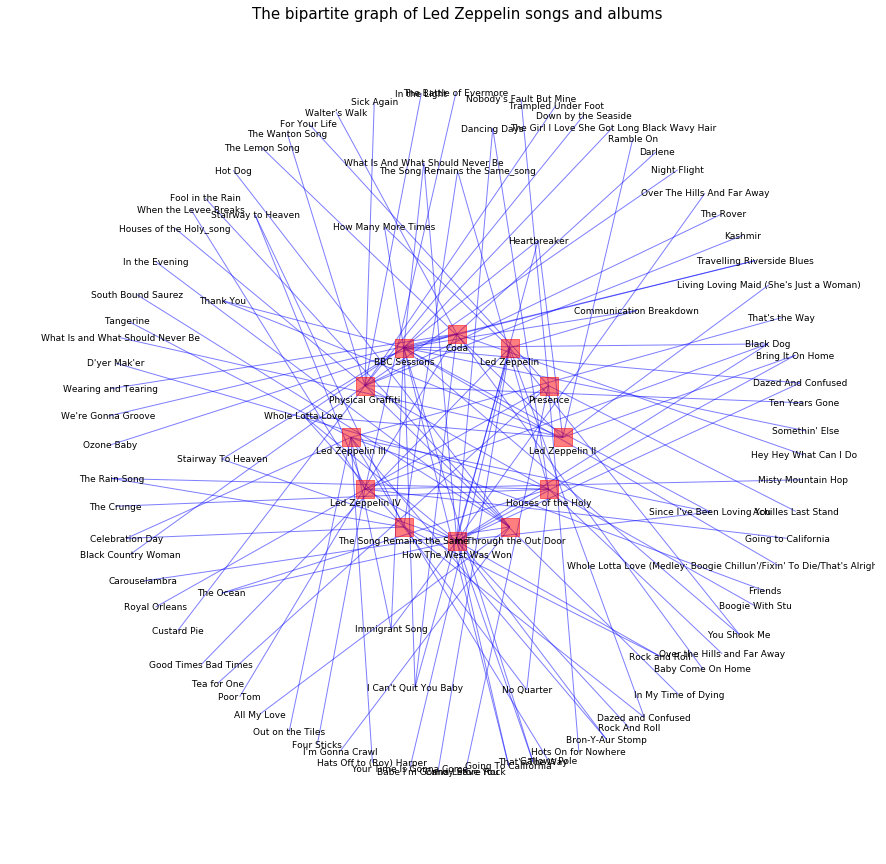

In [9]:
figsize=(15,15)

plt.figure(figsize=figsize);
nodes1 = nx.draw_networkx_nodes(H, pos, nodelist=list(albums),node_color="r",node_shape='s',alpha=0.5)#"#ffb3b3"
nodes2 = nx.draw_networkx_nodes(H, pos, nodelist=list(songs),node_size=0,node_color="g",node_shape='o',alpha=0.5)#"#b3ffb3"
nx.draw_networkx_edges(H, pos, edge_color="b", alpha=0.5)
plt.axis('off');
yoffset = {}
y_off = -0.04  # offset on the y axis
for k, v in pos.items():
    if k in albums:
        yoffset[k] = (v[0], v[1]+y_off)
    else:
        yoffset[k] = v
nx.draw_networkx_labels(H, yoffset,font_size=9);
sst="The bipartite graph of %s songs and albums" %band
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

### 2. The intersection graph of albums in the songs that they contain

In [10]:
aed=[]
for a1 in albums:
    for a2 in albums:
        if a2!=a1:
            t=[]
            for s in songs:
                if ((s,a1) in H.edges() and (s,a2) in H.edges()) or ((a1,s) in H.edges() and (a2,s) in H.edges()):
                    t.append(s)
            if len(t)>0:
                aed.append((a1, a2, len(t)))
waed=[]
for t in aed:
    weight={'weight':t[2]}
    waed.append((t[0],t[1],weight))
waed=sorted(waed)
HA=nx.Graph()
HA.add_edges_from(waed)
print "The graph HA connecting albums containing common songs has: \n %i nodes and %i edges" %(len(HA.nodes()),len(HA.edges()))
print "Is HA weighted?", nx.is_weighted(HA)

The graph HA connecting albums containing common songs has: 
 9 nodes and 18 edges
Is HA weighted? True


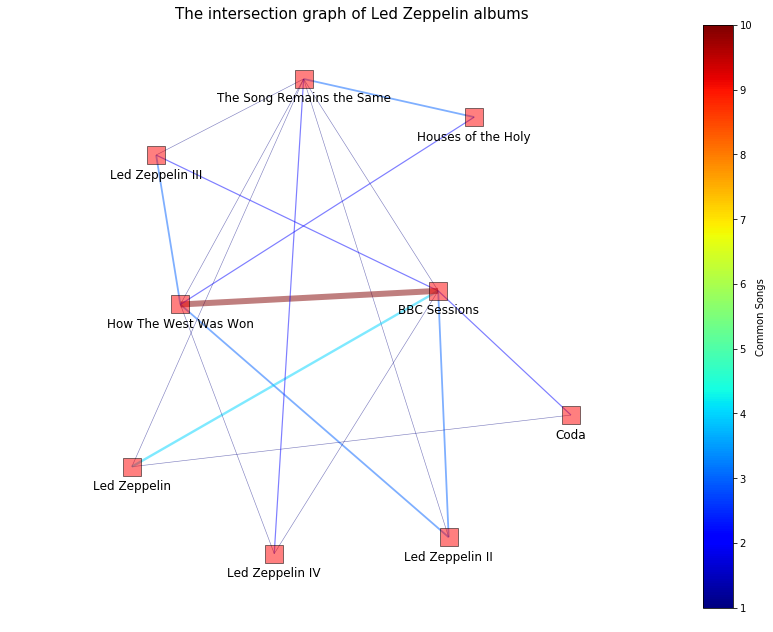

In [11]:
weight=nx.get_edge_attributes(HA,'weight')
weight_list = [ e[2]['weight'] for e in HA.edges(data=True) ]
weight_list

cmap=plt.cm.jet #BrBG #ocean #coolwarm #plt.cm.tab20b
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
width_list=[0.6*w for w in weight_list] # [math.log(1+w) for w in weight_list]

plt.figure(figsize=(10,7));
pos = nx.spring_layout(HA, k=15, iterations=200) #graphviz_layout(HA)
node_border_color='k'
nodes = nx.draw_networkx_nodes(HA, pos=pos,node_shape='s', node_color='r', alpha=0.5) #'#A0CBE2')
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(HA, pos=pos,width=width_list,edge_color=weight_list,edge_cmap=cmap,vmin=vmin, vmax=vmax,alpha=0.5)
# nx.draw_networkx_edge_labels(HA,pos=pos,edge_labels=weight);
plt.axis('off');
yoffset = {}
y_off = -0.08  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(HA, yoffset);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Common Songs") #, orientation='horizontal')
plt.tight_layout(-5)
sst="The intersection graph of %s albums" %band
plt.title(sst,fontsize=15);
plt.margins(x=0.2, y=0.1) 

### 3. The graph of co-occurent songs in the albums

In [12]:
aed=[]
for a1 in songs:
    for a2 in songs:
        if a2!=a1:
            t=[]
            for s in albums:
                if ((s,a1) in H.edges() and (s,a2) in H.edges()) or ((a1,s) in H.edges() and (a2,s) in H.edges()):
                    t.append(s)
            if len(t)>0:
                aed.append((a1, a2, len(t)))
waed=[]
for t in aed:
    weight={'weight':t[2]}
    waed.append((t[0],t[1],weight))
waed=sorted(waed)
HA=nx.Graph()
HA.add_edges_from(waed)
print "The graph HA connecting songs co-occurring in albums has: \n %i nodes and %i edges" %(len(HA.nodes()),len(HA.edges()))
print "Is HA weighted?", nx.is_weighted(HA)

The graph HA connecting songs co-occurring in albums has: 
 89 nodes and 589 edges
Is HA weighted? True


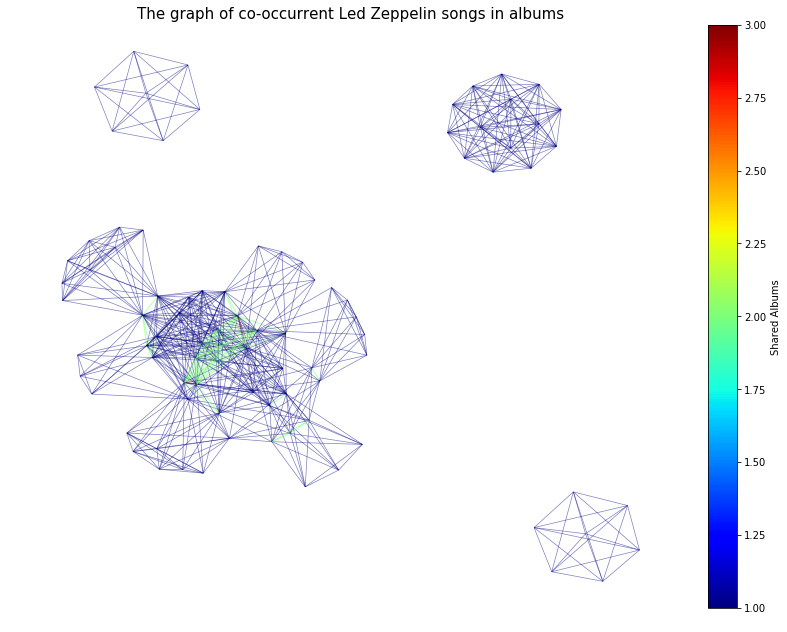

In [13]:
weight=nx.get_edge_attributes(HA,'weight')
weight_list = [ e[2]['weight'] for e in HA.edges(data=True) ]
weight_list

cmap=plt.cm.jet #BrBG #ocean #coolwarm #plt.cm.tab20b
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
width_list=[math.log(1+w) for w in weight_list] # [0.6*w for w in weight_list]

plt.figure(figsize=(10,7));
pos=graphviz_layout(HA)
node_border_color='k'
nodes = nx.draw_networkx_nodes(HA, pos=pos,node_size=0,node_shape='s', node_color='r', alpha=0.5) #'#A0CBE2')
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(HA, pos=pos,width=width_list,edge_color=weight_list,edge_cmap=cmap,vmin=vmin, vmax=vmax,alpha=0.5)
plt.axis('off');
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Shared Albums") #, orientation='horizontal')
plt.tight_layout(-5)
sst="The graph of co-occurrent %s songs in albums" %band
plt.title(sst,fontsize=15);

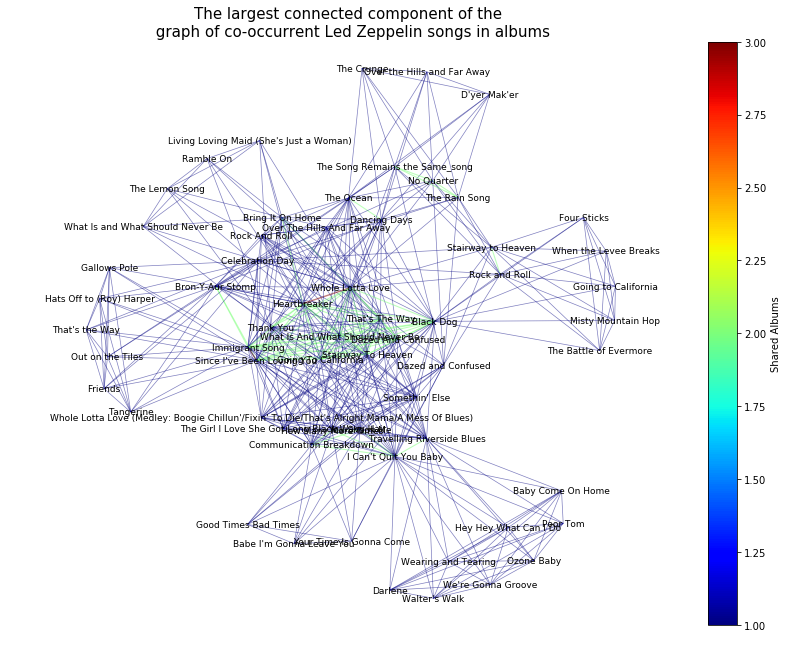

In [14]:
giant = max(nx.connected_component_subgraphs(HA), key=len)
plt.figure(figsize=(10,7));
HA=giant
weight=nx.get_edge_attributes(HA,'weight')
weight_list = [ e[2]['weight'] for e in HA.edges(data=True) ]
weight_list

cmap=plt.cm.jet #BrBG #ocean #coolwarm #plt.cm.tab20b
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
width_list=[math.log(1+w) for w in weight_list] # [0.6*w for w in weight_list]

pos=graphviz_layout(HA)
node_border_color='k'
nodes = nx.draw_networkx_nodes(HA, pos=pos,node_size=0,node_shape='s', node_color='r', alpha=0.5) #'#A0CBE2')
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(HA, pos=pos,width=width_list,edge_color=weight_list,edge_cmap=cmap,vmin=vmin, vmax=vmax,alpha=0.5)
plt.axis('off');
yoffset = {}
y_off = -0.08  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(HA, yoffset,font_size=9,);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Shared Albums") #, orientation='horizontal')
plt.tight_layout(-5)
sst="The largest connected component of the \n graph of co-occurrent %s songs in albums" %band
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.05) 